In [1]:
import atoti
import pandas as pd

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


## Instantiate Atoti Server and UI

In [2]:
# Start an Atoti Server instance
session = atoti.Session(
    user_content_storage="./content",
    port=9092,
    java_options=["-Xms1G", "-Xmx10G"],
    # app_extensions=tt.ADVANCED_APP_EXTENSION,
)
session.link

http://localhost:9092

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

## Inspect Data Quality Using Pandas

In [3]:
customer_dim_df = pd.read_csv("data/customer_dim.csv", encoding='latin-1')
customer_dim_df.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [4]:
item_dim_df = pd.read_csv("data/item_dim.csv", encoding='latin-1')
item_dim_df.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [5]:
store_dim_df = pd.read_csv("data/store_dim.csv", encoding='latin-1')
store_dim_df.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [6]:
time_dim_df = pd.read_csv("data/time_dim.csv", encoding='latin-1')
time_dim_df.head()
time_dim_df['date'] = pd.to_datetime(time_dim_df['date'], dayfirst=True)
time_dim_df.dtypes

time_key            object
date        datetime64[ns]
hour                 int64
day                  int64
week                object
month                int64
quarter             object
year                 int64
dtype: object

In [7]:
trans_dim_df = pd.read_csv("data/trans_dim.csv", encoding='latin-1')
trans_dim_df.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [8]:
fact_table_df = pd.read_csv("data/fact_table.csv", encoding='latin-1')
fact_table_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [9]:
# Check for null values
list = [ fact_table_df, customer_dim_df, item_dim_df, store_dim_df, time_dim_df, trans_dim_df ]

for x in list:
    print(x.isnull().sum(axis = 0))
    print("-----------------------")

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64
-----------------------
coustomer_key     0
name             27
contact_no        0
nid               0
dtype: int64
-----------------------
item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           1
dtype: int64
-----------------------
store_key    0
division     0
district     0
upazila      0
dtype: int64
-----------------------
time_key    0
date        0
hour        0
day         0
week        0
month       0
quarter     0
year        0
dtype: int64
-----------------------
payment_key    0
trans_type     0
bank_name      1
dtype: int64
-----------------------


## Load Pandas DataFrame Into Atoti Cube

In [10]:
# Load Pandas DataFrame as Atoti Table Objects
sales_fact_table = session.read_pandas(fact_table_df, table_name="sales_fact_table")
customer_dim_table = session.read_pandas(customer_dim_df, table_name="customer_dim_table")
item_dim_table = session.read_pandas(item_dim_df, table_name="item_dim_table")
store_dim_table = session.read_pandas(store_dim_df, table_name="store_dim_table")
time_dim_table = session.read_pandas(time_dim_df, table_name="time_dim_table")
trans_dim_table = session.read_pandas(trans_dim_df, table_name="trans_dim_table")

# Join data from fact table to dimensions
sales_fact_table.join(customer_dim_table, sales_fact_table["coustomer_key"] == customer_dim_table["coustomer_key"])
sales_fact_table.join(item_dim_table, sales_fact_table["item_key"] == item_dim_table["item_key"])
sales_fact_table.join(store_dim_table, sales_fact_table["store_key"] == store_dim_table["store_key"])
sales_fact_table.join(time_dim_table, sales_fact_table["time_key"] == time_dim_table["time_key"])
sales_fact_table.join(trans_dim_table, sales_fact_table["payment_key"] == trans_dim_table["payment_key"])

In [11]:
cube = session.create_cube(sales_fact_table)

## Cube Data Model Analysis

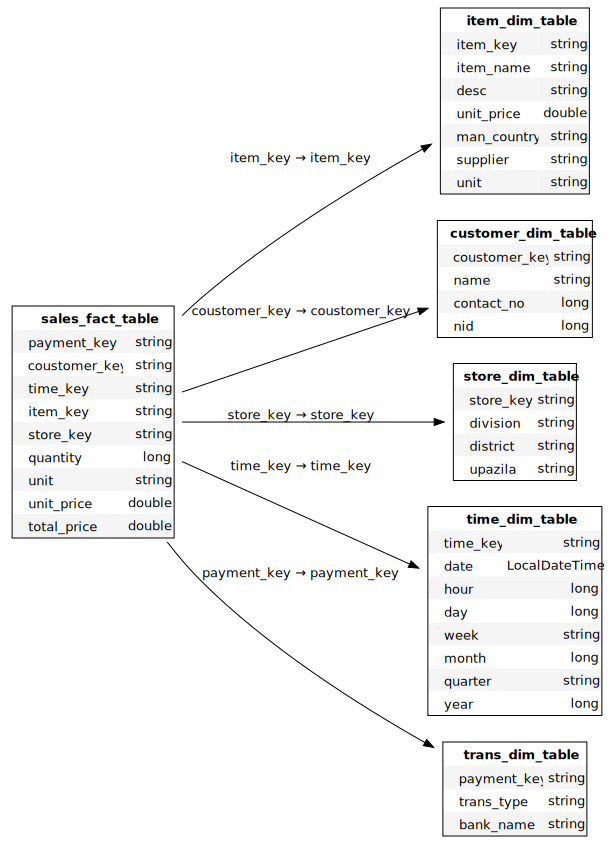

In [12]:
cube.schema

In [13]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

In [14]:
# View hierarchies for the cube
cube.create_date_hierarchy("muilti-level date", column=time_dim_table["date"])
h

{('sales_fact_table', 'coustomer_key'): <atoti.hierarchy.Hierarchy object at 0x2c7864760>, ('item_dim_table', 'unit'): <atoti.hierarchy.Hierarchy object at 0x2c78646a0>, ('store_dim_table', 'district'): <atoti.hierarchy.Hierarchy object at 0x2c78645e0>, ('trans_dim_table', 'trans_type'): <atoti.hierarchy.Hierarchy object at 0x2c7864280>, ('store_dim_table', 'upazila'): <atoti.hierarchy.Hierarchy object at 0x2c78641c0>, ('store_dim_table', 'division'): <atoti.hierarchy.Hierarchy object at 0x2c7864070>, ('sales_fact_table', 'unit'): <atoti.hierarchy.Hierarchy object at 0x2c7866620>, ('item_dim_table', 'item_name'): <atoti.hierarchy.Hierarchy object at 0x2c7866710>, ('sales_fact_table', 'payment_key'): <atoti.hierarchy.Hierarchy object at 0x2c7866800>, ('time_dim_table', 'date'): <atoti.hierarchy.Hierarchy object at 0x2c78668f0>, ('time_dim_table', 'week'): <atoti.hierarchy.Hierarchy object at 0x2c78669e0>, ('time_dim_table', 'quarter'): <atoti.hierarchy.Hierarchy object at 0x2c7866ad0>, ('customer_dim_table', 'name'): <atoti.hierarchy.Hierarchy object at 0x2c7866bc0>, ('sales_fact_table', 'time_key'): <atoti.hierarchy.Hierarchy object at 0x2c7866cb0>, ('sales_fact_table', 'item_key'): <atoti.hierarchy.Hierarchy object at 0x2c7866da0>, ('time_dim_table', 'muilti-level date'): <atoti.hierarchy.Hierarchy object at 0x2c7866e90>, ('item_dim_table', 'man_country'): <atoti.hierarchy.Hierarchy object at 0x2c7866f80>, ('sales_fact_table', 'store_key'): <atoti.hierarchy.Hierarchy object at 0x2c78671f0>, ('item_dim_table', 'supplier'): <atoti.hierarchy.Hierarchy object at 0x2c78672e0>, ('item_dim_table', 'desc'): <atoti.hierarchy.Hierarchy object at 0x2c78673d0>, ('trans_dim_table', 'bank_name'): <atoti.hierarchy.Hierarchy object at 0x2c78674c0>}

In [15]:
# View levels for the cube
l

In [16]:
# View measures for the cube
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x2c2bc2500>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x2c2bc2890>, 'unit_price.SUM': <atoti.measure.Measure object at 0x2c2bc28c0>, 'unit_price.MEAN': <atoti.measure.Measure object at 0x2c2bc2830>, 'quantity.SUM': <atoti.measure.Measure object at 0x2c2bc2860>, 'quantity.MEAN': <atoti.measure.Measure object at 0x2c2bc26b0>, 'total_price.SUM': <atoti.measure.Measure object at 0x2c2bc27a0>, 'total_price.MEAN': <atoti.measure.Measure object at 0x2c2bc27d0>}

## Data Analysis and Visualization in Atoti

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
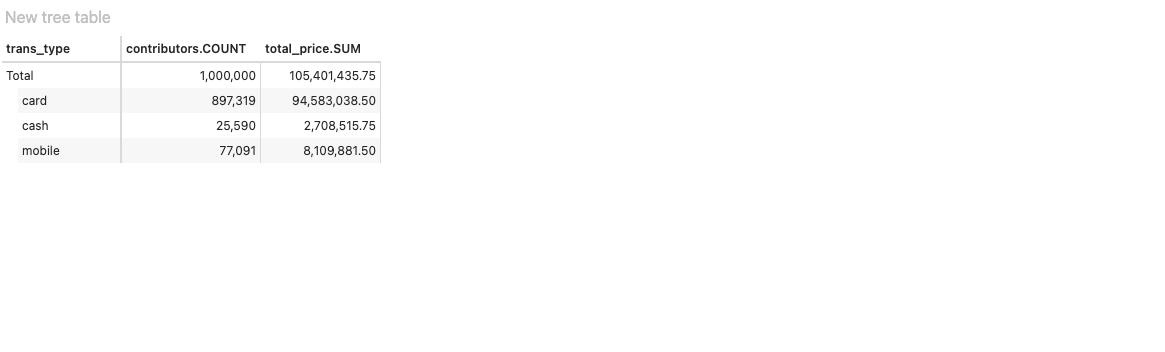

In [17]:
# Slciing by one hierarchy: trans_type
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
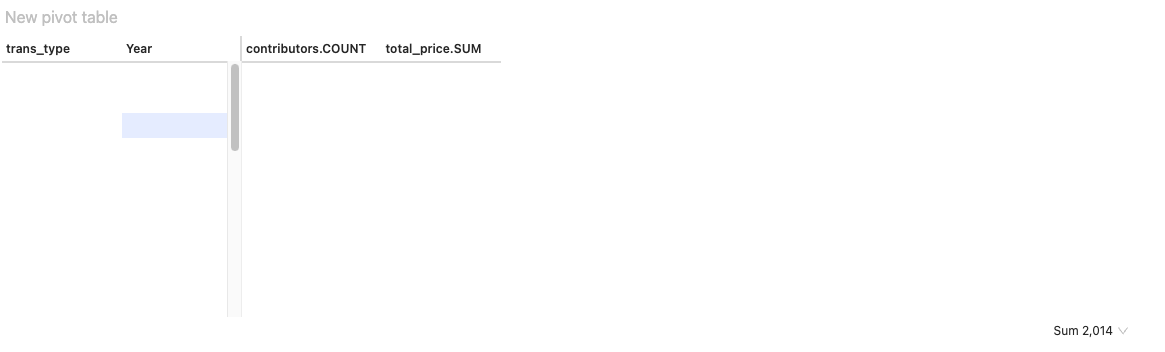

In [18]:
# Slciing by two hierarchies: trans_type x year
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
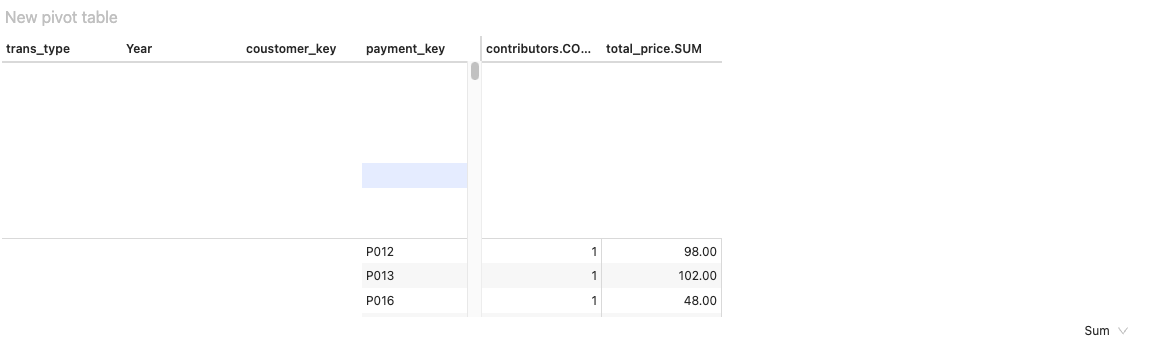

In [19]:
# Slicing by three hierarchies: trans_type x year x customer
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
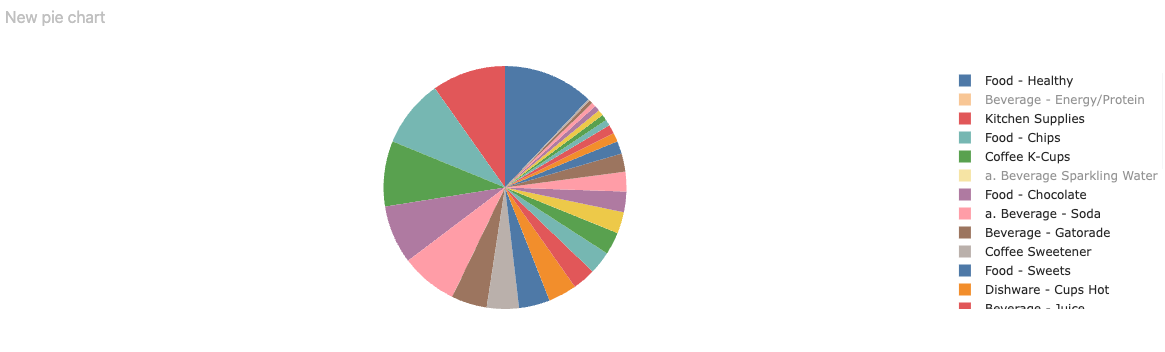

In [20]:
# Slicing by one category: item category
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
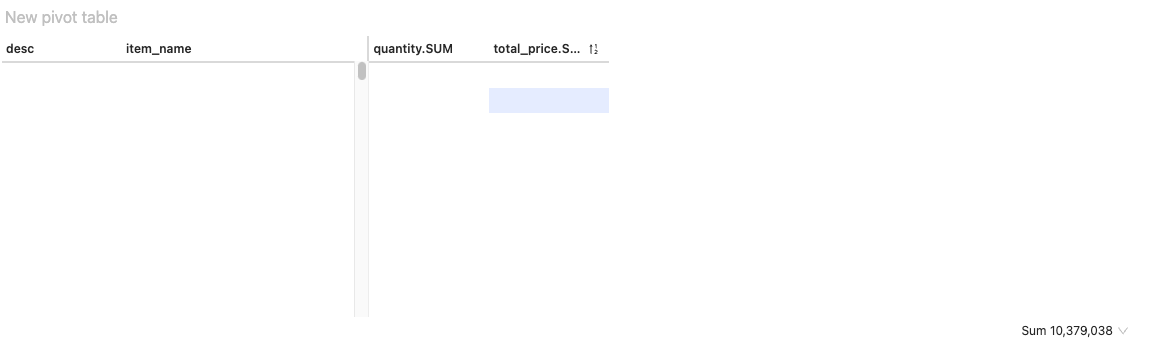

In [22]:
# Slicing by two hierarchies: item category x item name
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
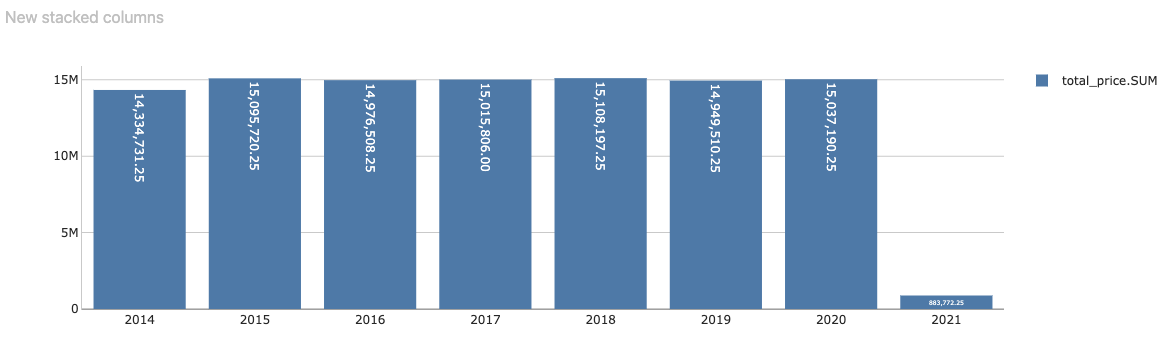

In [23]:
session.widget